In [256]:
import pathlib
path=str(pathlib.Path().resolve().parent)+"/imagenes/"

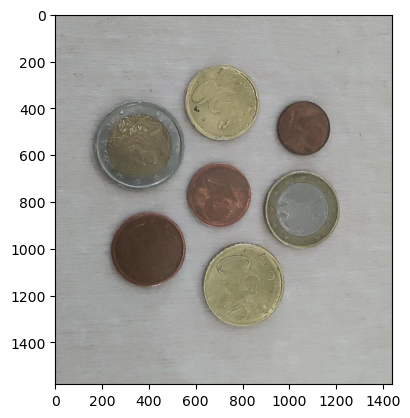

In [257]:
import cv2 as cv
import matplotlib.pyplot as plt


img_file = path + "monedas.jpg"
img = cv.imread(img_file)
img2 = cv.cvtColor(img, cv.COLOR_BGR2RGB)
plt.imshow(img2)

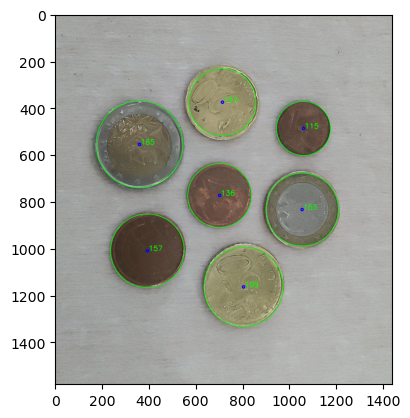

In [259]:
import numpy as np


gris = cv.cvtColor(img, cv.COLOR_BGR2GRAY)
# plt.imshow(gris, cmap="gray")
gris = cv.GaussianBlur(gris, (3,3), sigmaX=1, sigmaY=1)

# CAMBIAR PARAM1 Y PARAM2 PARA MEJORAR MONEDAS
circulos = cv.HoughCircles(gris, cv.HOUGH_GRADIENT, dp=1,
                           minDist=gris.shape[0]/10, param1=190, param2=35,
                           minRadius=50, maxRadius=200)
if circulos is not None:
  circulos = np.uint16(np.around(circulos))
  for circulo in circulos[0, :]:
    xcenter = circulo[0]
    ycenter = circulo[1]
    radio = circulo[2]
    cv.circle(img2, (xcenter, ycenter), radio, (0,255,0), 2)
    cv.circle(img2, (xcenter, ycenter), 5, (0,0,255), 3)
    cv.putText(img2, f"{radio}", (xcenter+5, ycenter),
               cv.FONT_HERSHEY_SIMPLEX, 1, (0,255,0),2)



plt.imshow(img2)